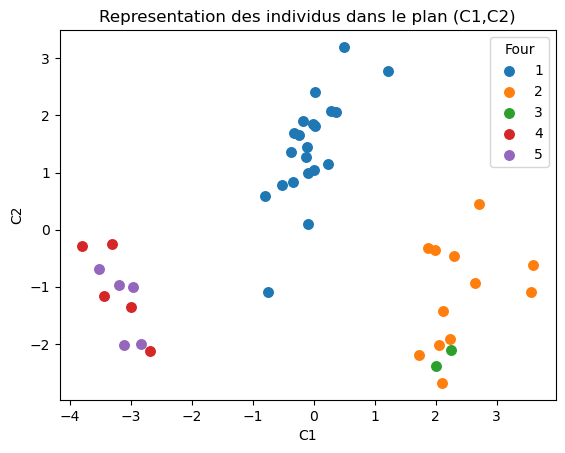

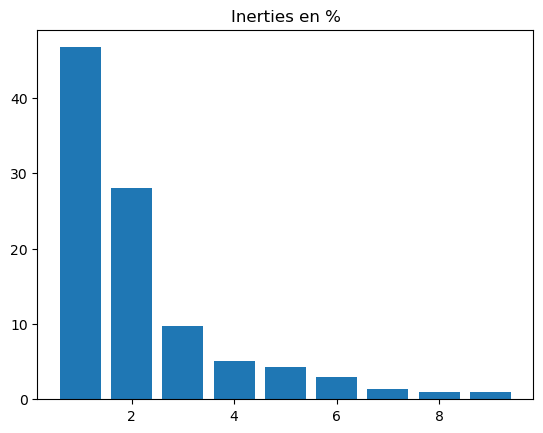

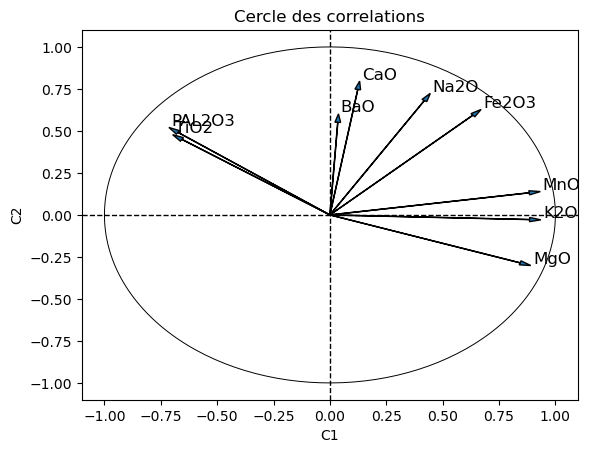

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
ACP
---
A fournir:
----------
  X : Ndarray, shape (n,p)
    Tableau individus/variables
Et optionnellement pour les graphiques, les tableaux:
  labels : ndarray of strings, shape (n,)
    Etiquette de chaque individu, sera realisee par une couleur

  indiv : ndarray of strings, shape (n,)
    Les noms des individus, places sur le graphique.
    P.ex. indiv est la marque de voiture et label sa categorie (luxe,...)

  varbs : ndarray of strings, shape (p,)
    Noms de variables, pour le cercle des correlations
"""
import numpy as np
import matplotlib.pyplot as plt
#from importlib import reload; import ACP;reload(ACP)

# Par defaut
labels=None
indiv=[]
varbs=None

# Lecture des donnees de poterie
pot=np.loadtxt("Poteries.csv",skiprows=1,usecols=range(0,10))
labels=pot[:,9] # Les numeros de four
labels=np.array([str(a)[0] for a in labels])
X=pot[:,np.arange(0,9)]
varbs=np.loadtxt("Poteries.csv",dtype='str',usecols=range(0,9))[0,:]
#
def stdise(X):
  """Routine de standardisation
     On pourrrait utiliser scikitlearn: Exemple:
       from sklearn.preprocessing import StandardScaler
       X=np.arange(12).reshape((4,3))
       print(StandardScaler().fit_transform(X))
  """
  Xs=X.astype(float)
  mk=np.mean(Xs,axis=0)
  # Calcul de l'ecart-type avec max pour eviter une division par 0
  sk=np.maximum(np.std(Xs,axis=0),10*np.finfo(float).eps)
  Xs=(X-mk)/sk
  return Xs, mk, sk
# SVD. Axes Composantes
# Apres standardisation les colonnes sont de norme "nb de ligne" et non 1,
# on corrige cela, pour avoir de meilleures echelles.
Xs, mk,sk=stdise(X)

(U,D,VT) = np.linalg.svd(Xs,full_matrices=False)
V=VT.T
# Premieres composantes principales
C1 = D[0]*U[:,0]
C2 = D[1]*U[:,1]
C3 = D[2]*U[:,2]
# Axes principaux modifies pour le cercle des correlations
A1 = D[0]*V[:,0]/np.sqrt(np.shape(X)[0])
A2 = D[1]*V[:,1]/np.sqrt(np.shape(X)[0])
# Graphiques
plt.close('all')
plt.figure()
plt.title('Representation des individus dans le plan (C1,C2)')
if labels is None:
  plt.scatter(C1,C2)
else:
  vlab=np.unique(labels)
  lv=len(vlab)
  #cols=['C0','C1','C2','C3','k'] # un choix de couleurs
  #cols=plt.cm.nipy_spectral(np.arange(lv)/lv) # un choix de couleurs
  for i,vl in enumerate(vlab):
    l=labels==vl
    plt.scatter(C1[l],C2[l],s=47,label=vl)#,color=cols[i])
  plt.legend(title="Four")
for i,nm in enumerate(indiv): plt.text(C1[i],C2[i],nm)
plt.xlabel('C1')
plt.ylabel('C2')

# Inerties
plt.figure()
plt.bar(np.arange(np.shape(D)[0])+1,100*D**2/sum(D**2))
plt.title('Inerties en %')

# Cercle des correlations
if not varbs is None:
  plt.figure()
  plt.title('Cercle des correlations')
  Z = np.linspace(-np.pi, np.pi, 256,endpoint=True)
  C,S = np.cos(Z), np.sin(Z)
  plt.plot(C,S,c='black',lw=.7)
  plt.axvline(c='black',ls='dashed',lw=1)
  plt.axhline(c='black',ls='dashed',lw=1)
  for i, txt in enumerate(varbs):
    plt.arrow(0,0,A1[i],A2[i], length_includes_head=True,
            head_width=0.025, head_length=.05)
    plt.annotate(txt, (A1[i]+.01,A2[i]+.01),fontsize=12)
  plt.xlabel('C1')
  plt.ylabel('C2')



Conclusion — PCA on Poteries Data

A Principal Component Analysis (PCA) was applied to the pottery dataset after standardizing the chemical variables.
Standardization ensures that all variables contribute equally to the analysis, independently of their original scales.
The PCA was computed using Singular Value Decomposition (SVD), which provides a stable and efficient numerical implementation.
The first principal components explain a large proportion of the total inertia, allowing an effective low-dimensional representation of the data.
The projection of individuals onto the first factorial plane shows that samples from the same kiln tend to cluster together, indicating similar chemical compositions.
The inertia (explained variance) plot confirms that only a small number of components is sufficient to capture most of the variability.
The correlation circle reveals groups of correlated chemical variables and helps interpret the meaning of the principal axes.
Overall, PCA is shown to be a powerful tool for dimensionality reduction, visualization, and interpretation of multivariate chemical data.

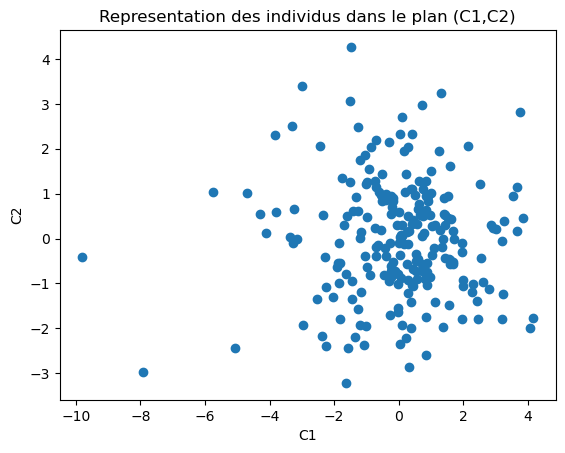

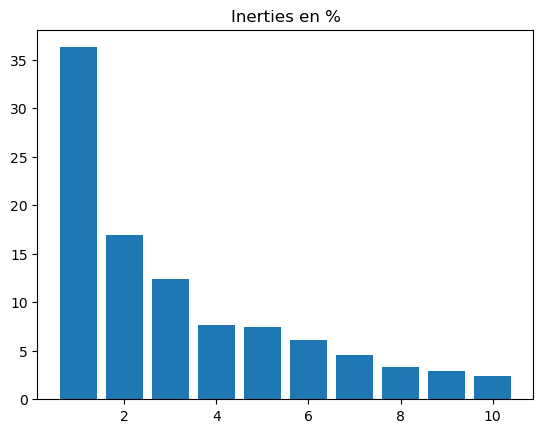

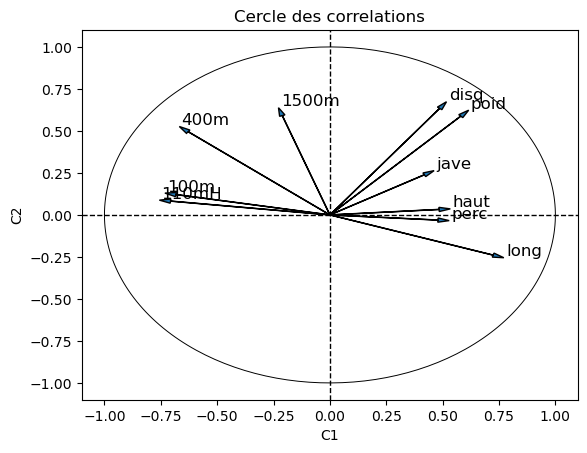

In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
ACP
---
A fournir:
----------
  X : Ndarray, shape (n,p)
    Tableau individus/variables
Et optionnellement pour les graphiques, les tableaux:
  labels : ndarray of strings, shape (n,)
    Etiquette de chaque individu, sera realisee par une couleur

  indiv : ndarray of strings, shape (n,)
    Les noms des individus, places sur le graphique.
    P.ex. indiv est la marque de voiture et label sa categorie (luxe,...)

  varbs : ndarray of strings, shape (p,)
    Noms de variables, pour le cercle des correlations
"""
import numpy as np
import matplotlib.pyplot as plt
#from importlib import reload; import ACP;reload(ACP)

# Par defaut
labels=None
indiv=[]
varbs=None

#COMMANDES DE LECTURE POUR LE DECATHLON

dec=np.loadtxt("Decathlon.csv",dtype='str',delimiter=',')
indiv=dec[:,0][1:]
dec=dec[:,1:-2] # On retire la premiere et les deux dernieres colonnes
varbs=dec[0,:]
X=dec[1:,:].astype(float)

#
def stdise(X):
  """Routine de standardisation
     On pourrrait utiliser scikitlearn: Exemple:
       from sklearn.preprocessing import StandardScaler
       X=np.arange(12).reshape((4,3))
       print(StandardScaler().fit_transform(X))
  """
  Xs=X.astype(float)
  mk=np.mean(Xs,axis=0)
  # Calcul de l'ecart-type avec max pour eviter une division par 0
  sk=np.maximum(np.std(Xs,axis=0),10*np.finfo(float).eps)
  Xs=(X-mk)/sk
  return Xs, mk, sk
# SVD. Axes Composantes
# Apres standardisation les colonnes sont de norme "nb de ligne" et non 1,
# on corrige cela, pour avoir de meilleures echelles.
Xs, mk,sk=stdise(X)

(U,D,VT) = np.linalg.svd(Xs,full_matrices=False)
V=VT.T
# Premieres composantes principales
C1 = D[0]*U[:,0]
C2 = D[1]*U[:,1]
C3 = D[2]*U[:,2]
# Axes principaux modifies pour le cercle des correlations
A1 = D[0]*V[:,0]/np.sqrt(np.shape(X)[0])
A2 = D[1]*V[:,1]/np.sqrt(np.shape(X)[0])
# Graphiques
plt.close('all')
plt.figure()
plt.title('Representation des individus dans le plan (C1,C2)')
if labels is None:
  plt.scatter(C1,C2)
#remove the hashtags if i want to have the labels displayed
#else:
#  vlab=np.unique(labels)
#  lv=len(vlab)
  #cols=['C0','C1','C2','C3','k'] # un choix de couleurs
  #cols=plt.cm.nipy_spectral(np.arange(lv)/lv) # un choix de couleurs
#  for i,vl in enumerate(vlab):
#    l=labels==vl
#    plt.scatter(C1[l],C2[l],s=47,label=vl)#,color=cols[i])
#  plt.legend(title="Four")
#for i,nm in enumerate(indiv): plt.text(C1[i],C2[i],nm)
plt.xlabel('C1')
plt.ylabel('C2')

# Inerties
plt.figure()
plt.bar(np.arange(np.shape(D)[0])+1,100*D**2/sum(D**2))
plt.title('Inerties en %')

# Cercle des correlations
if not varbs is None:
  plt.figure()
  plt.title('Cercle des correlations')
  Z = np.linspace(-np.pi, np.pi, 256,endpoint=True)
  C,S = np.cos(Z), np.sin(Z)
  plt.plot(C,S,c='black',lw=.7)
  plt.axvline(c='black',ls='dashed',lw=1)
  plt.axhline(c='black',ls='dashed',lw=1)
  for i, txt in enumerate(varbs):
    plt.arrow(0,0,A1[i],A2[i], length_includes_head=True,
            head_width=0.025, head_length=.05)
    plt.annotate(txt, (A1[i]+.01,A2[i]+.01),fontsize=12)
  plt.xlabel('C1')
  plt.ylabel('C2')



Conclusion — PCA on Decathlon Data (Raw Performances)

PCA was applied to standardized decathlon performance data using SVD.
The first components capture most of the total variability, allowing a low-dimensional representation.
The first axis reflects overall athletic performance, while the second differentiates types of events.
Athletes with similar performance profiles are grouped together in the factorial plane.
The correlation circle shows strong relationships between events of similar nature.
Interpretation is partially limited because running events are expressed as times, where lower values indicate better performance.

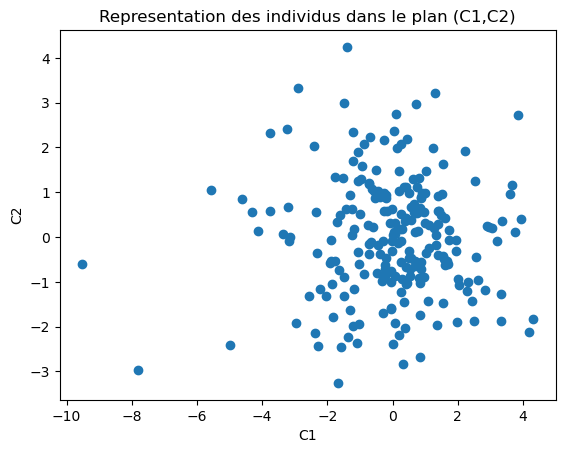

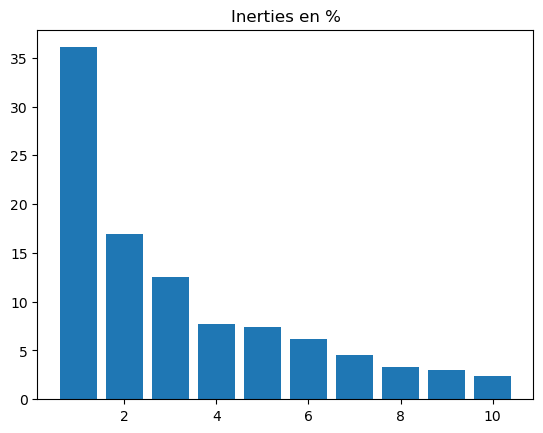

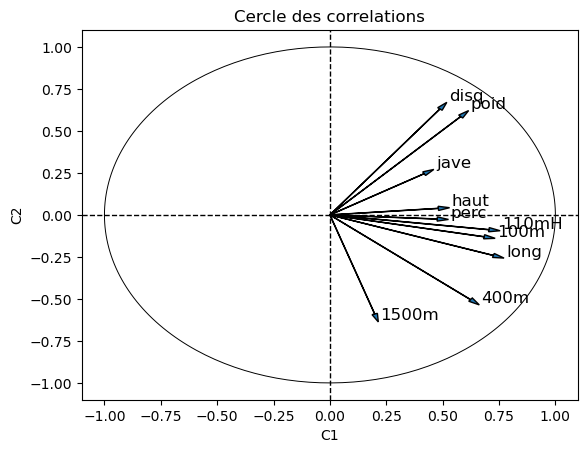

In [9]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
ACP
---
A fournir:
----------
  X : Ndarray, shape (n,p)
    Tableau individus/variables
Et optionnellement pour les graphiques, les tableaux:
  labels : ndarray of strings, shape (n,)
    Etiquette de chaque individu, sera realisee par une couleur

  indiv : ndarray of strings, shape (n,)
    Les noms des individus, places sur le graphique.
    P.ex. indiv est la marque de voiture et label sa categorie (luxe,...)

  varbs : ndarray of strings, shape (p,)
    Noms de variables, pour le cercle des correlations
"""
import numpy as np
import matplotlib.pyplot as plt
#from importlib import reload; import ACP;reload(ACP)

# Par defaut
labels=None
indiv=[]
varbs=None

#COMMANDES DE LECTURE POUR LE DECATHLON

dec=np.loadtxt("Decathlon.csv",dtype='str',delimiter=',')
indiv=dec[:,0][1:]
dec=dec[:,1:-2] # On retire la premiere et les deux dernieres colonnes
varbs=dec[0,:]
X=dec[1:,:].astype(float)

a = [x in ["100m", "110mH", "400m", "1500m"] for x in varbs]
X[:, a] = 1.0 / X[:, a]

#
def stdise(X):
  """Routine de standardisation
     On pourrrait utiliser scikitlearn: Exemple:
       from sklearn.preprocessing import StandardScaler
       X=np.arange(12).reshape((4,3))
       print(StandardScaler().fit_transform(X))
  """
  Xs=X.astype(float)
  mk=np.mean(Xs,axis=0)
  # Calcul de l'ecart-type avec max pour eviter une division par 0
  sk=np.maximum(np.std(Xs,axis=0),10*np.finfo(float).eps)
  Xs=(X-mk)/sk
  return Xs, mk, sk
# SVD. Axes Composantes
# Apres standardisation les colonnes sont de norme "nb de ligne" et non 1,
# on corrige cela, pour avoir de meilleures echelles.



Xs, mk,sk=stdise(X)

(U,D,VT) = np.linalg.svd(Xs,full_matrices=False)
V=VT.T
# Premieres composantes principales
C1 = D[0]*U[:,0]
C2 = D[1]*U[:,1]
C3 = D[2]*U[:,2]
# Axes principaux modifies pour le cercle des correlations
A1 = D[0]*V[:,0]/np.sqrt(np.shape(X)[0])
A2 = D[1]*V[:,1]/np.sqrt(np.shape(X)[0])
# Graphiques
plt.close('all')
plt.figure()
plt.title('Representation des individus dans le plan (C1,C2)')
if labels is None:
  plt.scatter(C1,C2)
#remove the hashtags if i want to have the labels displayed
#else:
#  vlab=np.unique(labels)
#  lv=len(vlab)
  #cols=['C0','C1','C2','C3','k'] # un choix de couleurs
  #cols=plt.cm.nipy_spectral(np.arange(lv)/lv) # un choix de couleurs
#  for i,vl in enumerate(vlab):
#    l=labels==vl
#    plt.scatter(C1[l],C2[l],s=47,label=vl)#,color=cols[i])
#  plt.legend(title="Four")
#for i,nm in enumerate(indiv): plt.text(C1[i],C2[i],nm)
plt.xlabel('C1')
plt.ylabel('C2')

# Inerties
plt.figure()
plt.bar(np.arange(np.shape(D)[0])+1,100*D**2/sum(D**2))
plt.title('Inerties en %')

# Cercle des correlations
if not varbs is None:
  plt.figure()
  plt.title('Cercle des correlations')
  Z = np.linspace(-np.pi, np.pi, 256,endpoint=True)
  C,S = np.cos(Z), np.sin(Z)
  plt.plot(C,S,c='black',lw=.7)
  plt.axvline(c='black',ls='dashed',lw=1)
  plt.axhline(c='black',ls='dashed',lw=1)
  for i, txt in enumerate(varbs):
    plt.arrow(0,0,A1[i],A2[i], length_includes_head=True,
            head_width=0.025, head_length=.05)
    plt.annotate(txt, (A1[i]+.01,A2[i]+.01),fontsize=12)
  plt.xlabel('C1')
  plt.ylabel('C2')



Conclusion — Decathlon PCA with Speeds

Converting running times to speeds makes all variables consistent in interpretation.
The PCA axes become easier to interpret and more meaningful.
Relationships between events are better represented in the correlation circle.

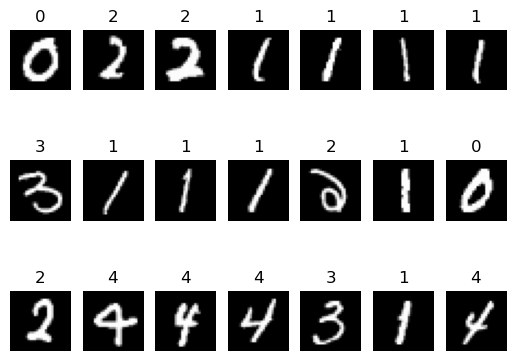

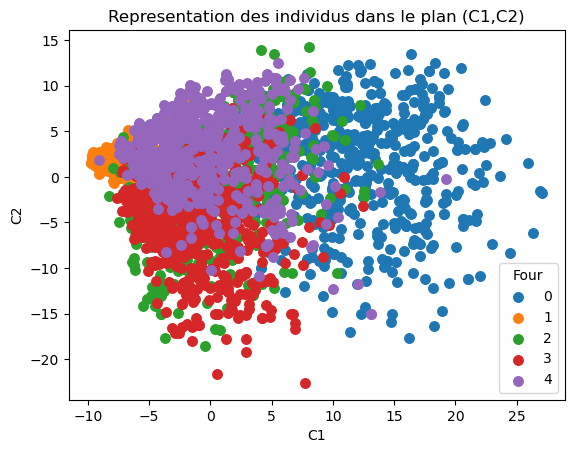

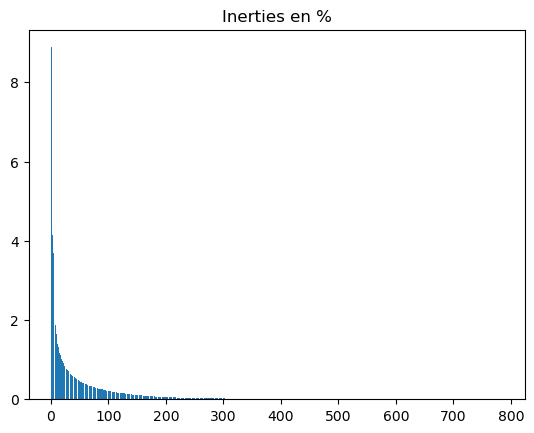

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
ACP
---
A fournir:
----------
  X : Ndarray, shape (n,p)
    Tableau individus/variables
Et optionnellement pour les graphiques, les tableaux:
  labels : ndarray of strings, shape (n,)
    Etiquette de chaque individu, sera realisee par une couleur

  indiv : ndarray of strings, shape (n,)
    Les noms des individus, places sur le graphique.
    P.ex. indiv est la marque de voiture et label sa categorie (luxe,...)

  varbs : ndarray of strings, shape (p,)
    Noms de variables, pour le cercle des correlations
"""
import numpy as np
import matplotlib.pyplot as plt
#from importlib import reload; import ACP;reload(ACP)

# Par defaut
labels=None
indiv=[]
varbs=None

#COMMANDES DE LECTURE POUR LES DIGITS AVEC UN EXEMPLE D"ILLUSTRATION

X=np.loadtxt("digits_extrait_images.csv",
  delimiter=',',skiprows=1,usecols=range(1,785))
labels=np.loadtxt("digits_extrait_labels.csv",
  delimiter=',',dtype='str',skiprows=1,usecols=range(1,2))

col=7
for i in range(3*col):
  plt.subplot(3,col,1+i)
  plt.imshow(np.reshape(X[i,:],[28,28]), cmap=plt.get_cmap('gray'))
  plt.title(int(labels[i]))
  plt.axis('off')
plt.show()

#
def stdise(X):
  """Routine de standardisation
     On pourrrait utiliser scikitlearn: Exemple:
       from sklearn.preprocessing import StandardScaler
       X=np.arange(12).reshape((4,3))
       print(StandardScaler().fit_transform(X))
  """
  Xs=X.astype(float)
  mk=np.mean(Xs,axis=0)
  # Calcul de l'ecart-type avec max pour eviter une division par 0
  sk=np.maximum(np.std(Xs,axis=0),10*np.finfo(float).eps)
  Xs=(X-mk)/sk
  return Xs, mk, sk
# SVD. Axes Composantes
# Apres standardisation les colonnes sont de norme "nb de ligne" et non 1,
# on corrige cela, pour avoir de meilleures echelles.
Xs, mk,sk=stdise(X)

(U,D,VT) = np.linalg.svd(Xs,full_matrices=False)
V=VT.T
# Premieres composantes principales
C1 = D[0]*U[:,0]
C2 = D[1]*U[:,1]
C3 = D[2]*U[:,2]
# Axes principaux modifies pour le cercle des correlations
A1 = D[0]*V[:,0]/np.sqrt(np.shape(X)[0])
A2 = D[1]*V[:,1]/np.sqrt(np.shape(X)[0])
# Graphiques
plt.close('all')
plt.figure()
plt.title('Representation des individus dans le plan (C1,C2)')
if labels is None:
  plt.scatter(C1,C2)
else:
  vlab=np.unique(labels)
  lv=len(vlab)
  #cols=['C0','C1','C2','C3','k'] # un choix de couleurs
  #cols=plt.cm.nipy_spectral(np.arange(lv)/lv) # un choix de couleurs
  for i,vl in enumerate(vlab):
    l=labels==vl
    plt.scatter(C1[l],C2[l],s=47,label=vl)#,color=cols[i])
  plt.legend(title="Four")
for i,nm in enumerate(indiv): plt.text(C1[i],C2[i],nm)
plt.xlabel('C1')
plt.ylabel('C2')

# Inerties
plt.figure()
plt.bar(np.arange(np.shape(D)[0])+1,100*D**2/sum(D**2))
plt.title('Inerties en %')

# Cercle des correlations
if not varbs is None:
  plt.figure()
  plt.title('Cercle des correlations')
  Z = np.linspace(-np.pi, np.pi, 256,endpoint=True)
  C,S = np.cos(Z), np.sin(Z)
  plt.plot(C,S,c='black',lw=.7)
  plt.axvline(c='black',ls='dashed',lw=1)
  plt.axhline(c='black',ls='dashed',lw=1)
  for i, txt in enumerate(varbs):
    plt.arrow(0,0,A1[i],A2[i], length_includes_head=True,
            head_width=0.025, head_length=.05)
    plt.annotate(txt, (A1[i]+.01,A2[i]+.01),fontsize=12)
  plt.xlabel('C1')
  plt.ylabel('C2')



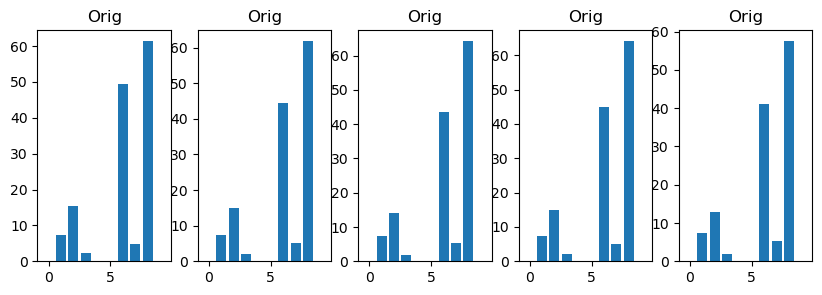

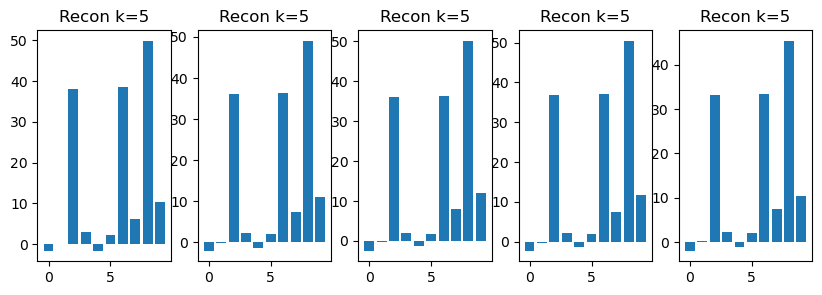

In [21]:


k = 5  # number of PCA components for reconstruction
indices = [0, 1, 2, 3, 4]

# Reconstruct
reconstructed = X[indices, :] @ V[:, :k] @ V[:, :k].T


# Originals
plt.figure(figsize=(10,3))
for i, idx in enumerate(indices):
    plt.subplot(1, len(indices), i+1)
    plt.bar(range(X.shape[1]), X[idx, :])
    plt.title(f'Orig {labels[idx]}' if labels is not None else 'Orig')
plt.show()

# Reconstructions
plt.figure(figsize=(10,3))
for i, idx in enumerate(indices):
    plt.subplot(1, len(indices), i+1)
    plt.bar(range(X.shape[1]), reconstructed[i, :])
    plt.title(f'Recon k={k}')
plt.show()



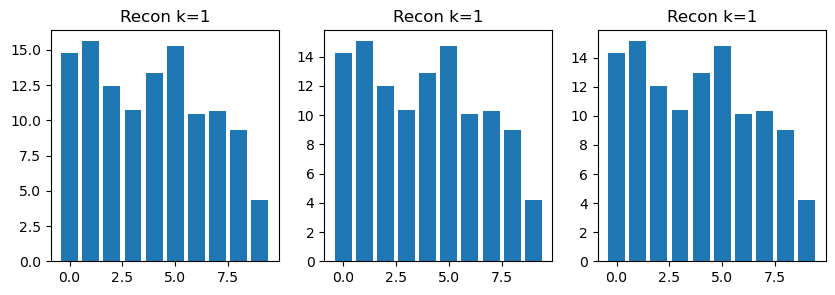

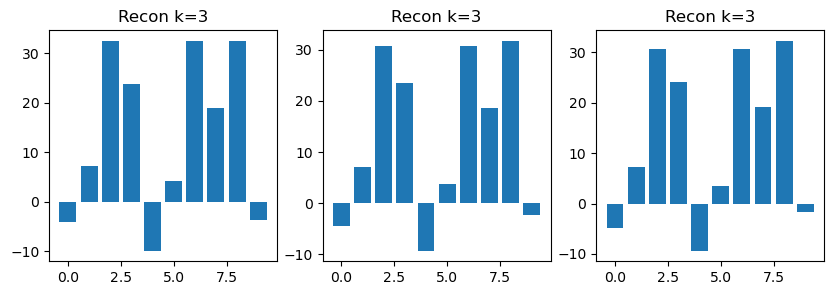

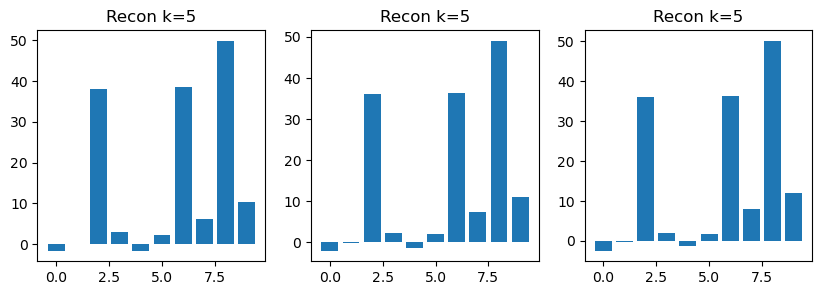

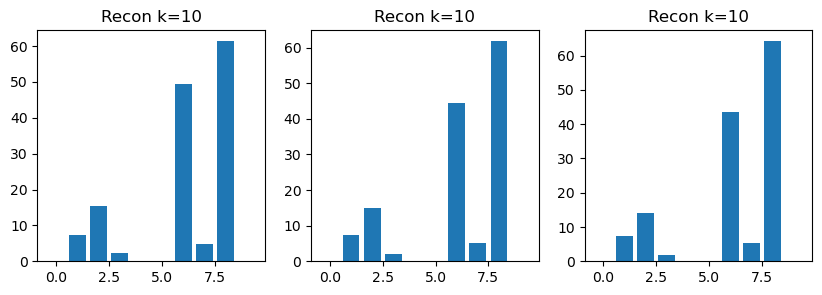

In [20]:
ks = [1, 3, 5, 10]
indices = [0, 1, 2]  # just a few samples

for k in ks:
    reconstructed = X[indices, :] @ V[:, :k] @ V[:, :k].T
    plt.figure(figsize=(10,3))
    for i, idx in enumerate(indices):
        plt.subplot(1, len(indices), i+1)
        plt.bar(range(X.shape[1]), reconstructed[i, :])
        plt.title(f'Recon k={k}')
    plt.show()


### Conclusion — PCA on Digits Datasets


- PCA reduces dimensionality while retaining the main structure of the data.
- Even with a small number of components `(k)`, the main patterns of the digits are captured.
- Increasing `k` improves the reconstruction accuracy, showing that higher-order components encode finer details.
- For this dataset, most of the variance is captured by the first few components, confirming PCA’s efficiency in summarizing correlated variables.
- Visualizing reconstructed digits (or features) helps to intuitively understand the trade-off between compression and information loss.

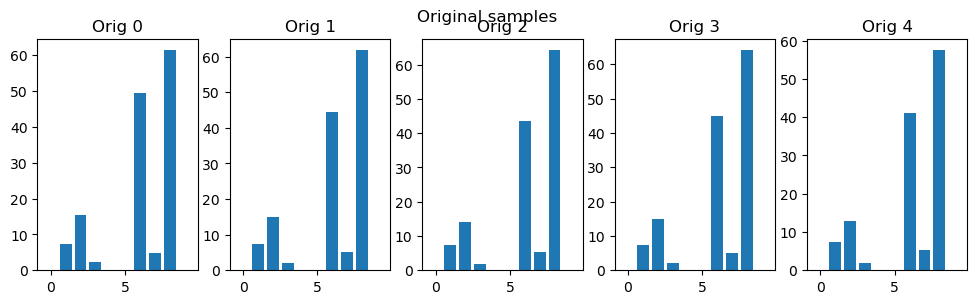

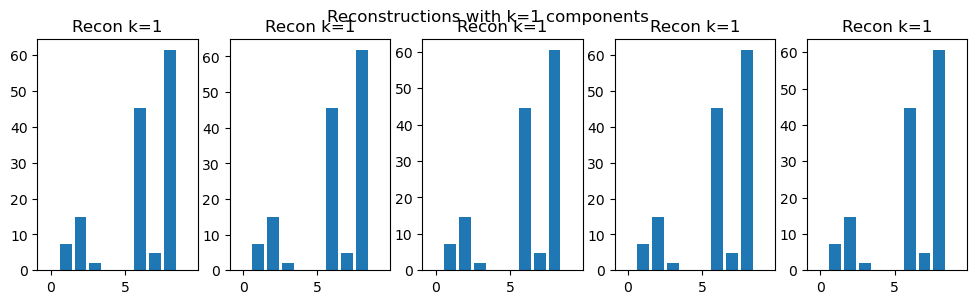

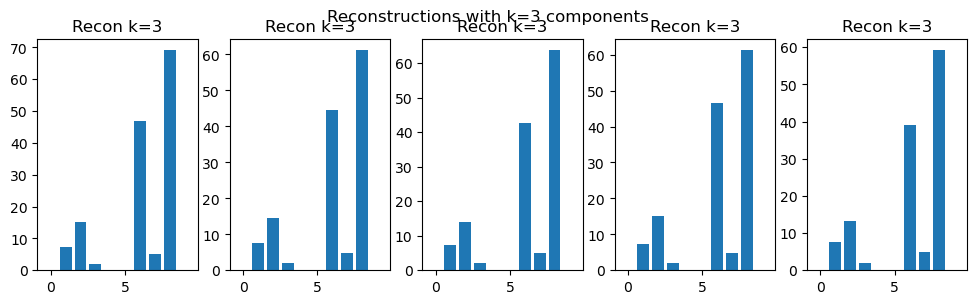

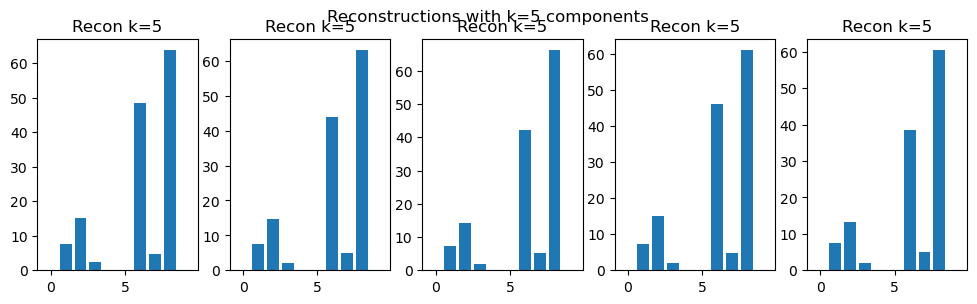

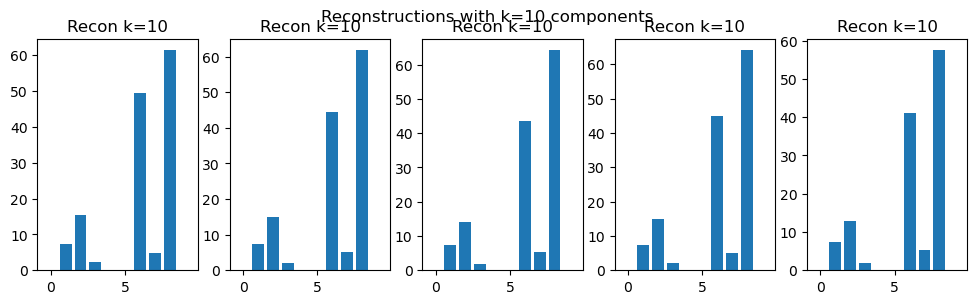

In [25]:
def proj(x, V, k):
    return (x.dot(V[:, :k])).dot(V[:, :k].T)

def recon(x, V, mk, sk, k):
    z = (x - mk) / sk
    z = proj(z, V, k)
    return z * sk + mk

indices = [0,1,2,3,4]   # samples to show
ks = [1, 3, 5, 10]      # number of components

# Originals
plt.figure(figsize=(12,3))
for i, idx in enumerate(indices):
    plt.subplot(1, len(indices), i+1)
    plt.bar(range(X.shape[1]), X[idx, :])
    plt.title(f'Orig {idx}')
plt.suptitle('Original samples')
plt.show()

# Reconstructions
for k in ks:
    plt.figure(figsize=(12,3))
    for i, idx in enumerate(indices):
        plt.subplot(1, len(indices), i+1)
        plt.bar(range(X.shape[1]), recon(X[idx, :], V, mk, sk, k))
        plt.title(f'Recon k={k}')
    plt.suptitle(f'Reconstructions with k={k} components')
    plt.show()
